# The study for HMC BIW PROJECT  

## M/L is used to estimate the value with parameters.  
#


In [1]:
# import libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# other utiles
import matplotlib.pyplot as plt
from  IPython import display
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib

In [2]:
# check the tensorflow version
print(tf.__version__)

2.1.0


# Pre-Checking Dataframe


In [96]:
#------------------------------------------------------
# read training dataset
#------------------------------------------------------
dir = r"F:\CON_2019_HMC_PGD-MINESET\0_MODEL\Second_model\Case2\MachinLearning_SVM"
csv = dir+r"\new_no_classification_regression_with_svm_total.csv"
dataset = pd.read_csv(csv)
# dataset = dataset.drop([0])
dataset.describe()


,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area,Disp
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,...,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,939.636895,941.713508,942.735081,941.314113,942.700403,939.654032,944.508065,944.172379,943.815524,943.422984,...,940.754637,941.623589,945.267742,943.397984,941.260887,942.253226,941.523790,943.093750,1178.546374,98.626383
std,265.474163,265.948292,266.729565,266.122131,265.753555,266.328239,263.980229,264.448607,265.503859,264.005137,...,266.459691,264.377185,264.545031,263.975754,265.648685,265.085314,266.625549,266.888735,1123.635248,3.476856
min,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,469.000000,468.000000,468.000000,...,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,-2258.899065,89.134949
25%,761.750000,770.750000,773.000000,763.750000,767.000000,758.000000,779.750000,779.000000,772.000000,778.000000,...,765.000000,773.500000,780.000000,778.750000,768.750000,775.000000,764.000000,766.750000,343.538483,96.304920
50%,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,...,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,920.663290,98.443939
75%,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,...,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1711.471901,100.631876
max,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,14282.906250,124.758057


In [97]:
# extract the columns from the dataset
column_names = dataset.columns
print("parameters      : {}".format(column_names[0:56]))
# print("output_curves   : {}".format(column_names[9:30]))
# print("output_region   : {}".format(column_names[32]))
print("output_Area     : {}".format(column_names[56]))
print("output_Intrusion: {}".format(column_names[57]))



parameters      : Index(['HLAYER01', 'HLAYER02', 'HLAYER03', 'HLAYER04', 'HLAYER05', 'HLAYER06',
       'HLAYER07', 'HLAYER08', 'HLAYER09', 'HLAYER10', 'HLAYER11', 'HLAYER12',
       'HLAYER13', 'HLAYER14', 'HLAYER15', 'HLAYER16', 'HLAYER17', 'HLAYER18',
       'HLAYER19', 'HLAYER20', 'HLAYER21', 'HLAYER22', 'HLAYER23', 'L02_CNR',
       'L02_FLG', 'L02_WALL', 'L03_CNR', 'L03_FLG', 'L03_WALL', 'L04_CNR',
       'L04_FLG', 'L04_WALL', 'L05_CNR', 'L05_FLG', 'L05_WALL', 'L06_CNR',
       'L06_FLG', 'L06_WALL', 'L07_CNR', 'L07_FLG', 'L07_WALL', 'L08_CNR',
       'L08_FLG', 'L08_WALL', 'L09_CNR', 'L09_FLG', 'L09_WALL', 'L10_CNR',
       'L10_FLG', 'L10_WALL', 'L11_CNR', 'L11_FLG', 'L11_WALL', 'L12_CNR',
       'L12_FLG', 'L12_WALL'],
      dtype='object')
output_Area     : Area
output_Intrusion: Disp


In [98]:
# pop of first column: train Maker
# dataset.pop(column_names[0])
# dataset.head()


In [99]:
#seperate data as region
# dataset_2 = dataset[dataset['region']==0]
# dataset_3 = dataset[dataset['region']==1]


In [100]:
# dataset_3[column_names[1]]

In [101]:
# Checking: min/max for each dataset
lst_max = (dataset.max(0))
lst_min = (dataset.min(0))

# lst_max_2 = (dataset_2.max(0))
# lst_min_2 = (dataset_2.min(0))

# lst_max_3 = (dataset_3.max(0))
# lst_min_3 = (dataset_3.min(0))

print("max={}, min={} of first Column".format(lst_max[57],lst_min[57] ))

max=124.75805659999999, min=89.13494873 of first Column


# M/L model

In [102]:
# Define functions

def norm(x, train_stats):
  stats=train_stats
  return (x - stats['mean']) / stats['std']

model = None
def build_model(iunit, ounit, train_dataset,activation="sigmoid",loss='binary_crossentropy',metrics=['accuracy']):
    model = keras.Sequential([
      layers.Dense(iunit, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.01), 
                   input_shape=[len(train_dataset.keys())]),
      layers.Dense(iunit, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.001)
                   ), 
      # layers.Dense(iunit, activation='relu', 
      #              kernel_regularizer=keras.regularizers.l2(0.001)
      #              ),                     
      # layers.Dense(iunit, activation='relu', 
      #              kernel_regularizer=keras.regularizers.l2(0.001)
      #              ),                    
      layers.Dense(ounit,activation=activation)
      ])
    # optimizer = tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    #optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #optimizer = tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    model.compile(
      loss=loss, #'mse', #'binary_crossentropy'
      optimizer=optimizer,
      # 'mae', 'mse', 'mape','accuracy'
      metrics=metrics)

    return model  

# Training
def training(EPOCHS=1000, model=model, normed_train_data=None, train_labels=None,verbose=0,monitor='accuracy',patience=5 ):
    model=model
    history = model.fit(
                          normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split = 0.2, verbose=verbose,
                          callbacks=[tfdocs.modeling.EpochDots()]
                          # callbacks=[keras.callbacks.TensorBoard(log_dir=dir+r'\logs')]
                          )
    print("% : Training : end", model) 
    early_stop = keras.callbacks.EarlyStopping(monitor=monitor, patience=patience) #loss,accuracy,val_loss,val_accuracy
    early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()]
                    # callbacks=[keras.callbacks.TensorBoard(log_dir=dir+r'\logs')]
                    )  

    return model, history, early_history   
                              

In [103]:
train_dataset = dataset.sample(frac=0.7)
test__dataset = dataset.drop(train_dataset.index)

# train_dataset_2 = dataset_2.sample(frac=0.7)
# test__dataset_2  = dataset_2.drop(train_dataset_2.index)

# train_dataset_3 = dataset_3.sample(frac=0.7)
# test__dataset_3  = dataset_3.drop(train_dataset_3.index)




In [104]:

# train_dataset_3

In [105]:
# # make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
train_stats
# train_stats_2 = train_dataset_2.describe()
# train_stats_3 = train_dataset_3.describe()

# train_stats_3.head()


,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area,Disp
count,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,...,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000,3472.000000
mean,940.041187,942.928859,938.517857,935.137673,946.103399,936.552131,943.999424,945.342166,944.549827,942.016705,...,940.599078,942.539747,950.321141,942.298963,944.245104,938.620104,939.480415,940.758641,1174.199507,98.622889
std,266.716663,265.006857,266.803666,266.205202,268.574080,266.869788,262.822756,266.100907,264.079879,265.494837,...,266.629936,263.092491,265.959766,265.303450,266.049325,263.168093,268.695956,265.627664,1125.375833,3.444735
min,468.000000,468.000000,468.000000,469.000000,468.000000,468.000000,468.000000,469.000000,468.000000,468.000000,...,468.000000,468.000000,468.000000,468.000000,469.000000,468.000000,468.000000,468.000000,-969.445321,89.134949
25%,757.000000,772.000000,762.750000,757.750000,757.750000,747.000000,773.000000,776.000000,778.000000,760.500000,...,761.750000,774.000000,780.000000,772.000000,776.000000,773.750000,759.000000,764.000000,340.311574,96.332392
50%,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,...,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,907.877917,98.449160
75%,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,...,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1707.060297,100.575926
max,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,14282.906250,124.758057


In [106]:
# # delete "Area" column from "train_stats"
for col in column_names[56:58]:
    train_stats.pop(col)
    # train_stats_2.pop(col)
    # train_stats_3.pop(col)

train_stats   = train_stats.transpose()    
# train_stats_2 = train_stats_2.transpose()
# train_stats_3 = train_stats_3.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
HLAYER01,3472.0,940.041187,266.716663,468.0,757.00,980.0,1180.0,1470.0
HLAYER02,3472.0,942.928859,265.006857,468.0,772.00,980.0,1180.0,1470.0
HLAYER03,3472.0,938.517857,266.803666,468.0,762.75,980.0,1180.0,1470.0
HLAYER04,3472.0,935.137673,266.205202,469.0,757.75,980.0,1180.0,1470.0
HLAYER05,3472.0,946.103399,268.574080,468.0,757.75,980.0,1180.0,1470.0
HLAYER06,3472.0,936.552131,266.869788,468.0,747.00,980.0,1180.0,1470.0
HLAYER07,3472.0,943.999424,262.822756,468.0,773.00,980.0,1180.0,1470.0
HLAYER08,3472.0,945.342166,266.100907,469.0,776.00,980.0,1180.0,1470.0
HLAYER09,3472.0,944.549827,264.079879,468.0,778.00,980.0,1180.0,1470.0
HLAYER10,3472.0,942.016705,265.494837,468.0,760.50,980.0,1180.0,1470.0


In [107]:
# train_stats_3
train_dataset.head()
# label = train_dataset.loc[:,'Intrusion']
# label

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area,Disp
971,1280,638,559,1220,725,885,793,1300,613,513,...,1130,1030,549,945,593,578,498,489,789.096397,97.639523
4914,780,780,780,780,1180,780,980,980,980,780,...,1180,1180,590,780,1470,980,1470,780,703.218750,97.723389
365,736,1200,836,498,936,475,509,803,626,947,...,1230,1290,500,935,536,915,1070,985,941.023146,101.409015
4149,1470,980,1180,980,1180,590,590,780,590,980,...,980,780,780,590,1470,980,780,980,1561.656250,102.041016
2718,780,1180,590,780,980,980,590,780,590,980,...,1180,1180,1180,1470,980,1470,980,1180,497.531250,96.900696


In [108]:
# make instances for dataset without the QoI
# train_labels_Reg    = train_dataset.loc[:,'region']
# test__labels_Reg    = test__dataset.loc[:,'region']
train_labels_Intr   = train_dataset.loc[:,'Disp']
test__labels_Intr   = test__dataset.loc[:,'Disp']
train_labels_Area   = train_dataset.loc[:,'Area']
test__labels_Area   = test__dataset.loc[:,'Area']

# train_labels_Intr_2 = train_dataset_2.loc[:,'Intrusion']
# test__labels_Intr_2 = test__dataset_2.loc[:,'Intrusion']
# train_labels_Area_2 = train_dataset_2.loc[:,'Area']
# test__labels_Area_2 = test__dataset_2.loc[:,'Area']

# train_labels_Intr_3 = train_dataset_3.loc[:,'Intrusion']
# test__labels_Intr_3 = test__dataset_3.loc[:,'Intrusion']
# train_labels_Area_3 = train_dataset_3.loc[:,'Area']
# test__labels_Area_3 = test__dataset_3.loc[:,'Area']

for i in range(56,58):    
    train_dataset.pop(column_names[i])
    test__dataset.pop(column_names[i])
    # train_dataset_2.pop(column_names[i])
    # test__dataset_2.pop(column_names[i])
    # train_dataset_3.pop(column_names[i])
    # test__dataset_3.pop(column_names[i])        

normed_train_data   = norm( train_dataset,  train_stats   )
normed_test__data   = norm( test__dataset,  train_stats   )
# normed_train_data_2 = norm( train_dataset_2,train_stats_2 )
# normed_test__data_2 = norm( test__dataset_2,train_stats_2 )
# normed_train_data_3 = norm( train_dataset_3,train_stats_3 )
# normed_test__data_3 = norm( test__dataset_3,train_stats_3 )  




In [109]:
# train_dataset_2.head()

## M/L for region

In [110]:
# from tensorflow.keras.utils import multi_gpu_model, to_categorical
# train_labels_Reg = to_categorical(train_labels_Reg)

In [111]:
# # create the model instance 
# EPOCHS = 1000
# nPar = 64
# nOut = 2
# iunit = nPar * nOut
# ounit = nOut
# print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))

# # from tensorflow.keras.utils import multi_gpu_model, to_categorical
# # train_labels_Reg = to_categorical(train_labels_Reg)
# model_Reg = build_model(iunit, ounit, train_dataset,activation='sigmoid',loss='mse',metrics=['accuracy'])
# model_Reg, model_Reg_history, model_Reg_early_history = training(EPOCHS, model_Reg, normed_train_data, train_labels_Reg, verbose=0, monitor='accuracy', patience=5)
# model_Reg.save(dir+r'\trainingdata_Intr_for_Zone_Reg.h5')

In [112]:
# test__labels_Reg = to_categorical(test__labels_Reg)
# # test_labels__Reg


In [113]:
# test_mae_score_Reg, test_mae_score1_Reg = model_Reg.evaluate(  normed_test__data, test__labels_Reg  )
# print(test_mae_score_Reg, test_mae_score1_Reg)

In [114]:
# train_predictions = model_Reg.predict(normed_train_data).flatten()
# test__predictions = model_Reg.predict(normed_test__data).flatten()
# print(type(train_predictions))
# print("{},{}".format(len(train_predictions),len(train_labels_Reg)))
# train_value=[]
# test__value=[]
# for i in range(0,len(train_predictions)-1):
#     if i % 2 == 0:
#         if train_predictions[i] < train_predictions[i+1] :
#             train_value.append(1)
#         else:
#             train_value.append(0)
# for i in range(0,len(test__predictions)-1):
#     if i % 2 == 0:           
#         if test__predictions[i] < test__predictions[i+1] :
#             test__value.append(1)
#         else:
#             test__value.append(0)            
# train_predictions = np.array(train_value)  
# test__predictions = np.array(test__value) 
# # len(out_array)

In [115]:
# print("{},{}".format(len(train_labels_Reg),len(train_predictions)))
# print("{},{}".format(len(test__labels_Reg),len(test__predictions)))
# train_predictions = to_categorical(train_predictions)
# test__predictions = to_categorical(test__predictions)

# print("dtype: {},{}".format(train_labels_Reg.dtype,  train_predictions.dtype))
# print("ndim:  {},{}".format(train_labels_Reg.ndim,   train_predictions.ndim))
# print("size:  {},{}".format(train_labels_Reg.size,   train_predictions.size))
# print("nbytes:{},{}".format(train_labels_Reg.nbytes, train_predictions.nbytes))



In [116]:

# print("{},{}".format(len(train_labels_Reg),len(train_predictions)))
# print("{},{}".format(len(test__labels_Reg),len(test__predictions)))

# plt.scatter(train_labels_Reg, train_predictions)
# plt.scatter(test__labels_Reg, test__predictions )
# plt.xlabel('True Values [Reg]')
# plt.ylabel('Predictions [Reg]')
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
# _ = plt.plot([0, 150], [0, 150])

In [117]:
# # test_predictions
# error = test__predictions - test__labels_Reg

# plt.hist(error, bins = 25)
# plt.xlabel("Prediction Error [region]")
# _ = plt.ylabel("Count")

In [118]:
# # train_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\train_dataset.csv")
# # test_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\test_dataset.csv")

# pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_region.csv")
# pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_region.csv")


In [119]:
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
# plotter.plot({'Basic': model_Reg_history}, metric = "loss")
# plt.ylim([0, 1])
# plt.ylabel('loss')

In [120]:
# # 모델 학습 과정 표시하기
# %matplotlib inline
# import matplotlib.pyplot as plt

# fig, loss_ax = plt.subplots()
# acc_ax = loss_ax.twinx()
# hist = model_Reg_early_history
# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

# loss_ax.set_xlabel('epoch')
# loss_ax.set_ylabel('loss')
# acc_ax.set_ylabel('accuray')

# loss_ax.legend(loc='upper left')
# acc_ax.legend(loc='lower left')

# plt.show()

## M/L for Intursion without classification

In [121]:
# # create the model instance 
EPOCHS = 5000
nPar = 128
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Intr = build_model(iunit, ounit, train_dataset,activation=None,loss='mse',metrics=['mse'])
model_Intr, model_Intr_history, model_Intr_early_history = training(EPOCHS, model_Intr, normed_train_data, train_labels_Intr, verbose=0, monitor='mse', patience=5)


model_Intr.save(dir+r'\trainingdata_Intr_for_Zone.h5')

nPar: 128, nOut: 1, iunit: 128, ounit: 1

Epoch: 0, loss:5495.2548,  mse:5494.0928,  val_loss:481.7139,  val_mse:480.1457,  
....................................................................................................
Epoch: 100, loss:1.7246,  mse:0.4661,  val_loss:27.6384,  val_mse:26.3823,  
....................................................................................................
Epoch: 200, loss:1.3123,  mse:0.4197,  val_loss:18.7426,  val_mse:17.8515,  
....................................................................................................
Epoch: 300, loss:1.2707,  mse:0.5851,  val_loss:13.5348,  val_mse:12.8498,  
....................................................................................................
Epoch: 400, loss:1.0377,  mse:0.4788,  val_loss:9.9229,  val_mse:9.3641,  
....................................................................................................
Epoch: 500, loss:0.9833,  mse:0.5080,  val_loss:8.5006,  val_mse

In [122]:
test_mae_score_Intr, test_mae_score1_Intr = model_Intr.evaluate(  normed_test__data, test__labels_Intr  )
print(test_mae_score_Intr, test_mae_score1_Intr)

1488/1488 [==============================] - 0s 27us/sample - loss: 5.5607 - mse: 5.4066
5.5607234072941605 5.406579


3472,3472


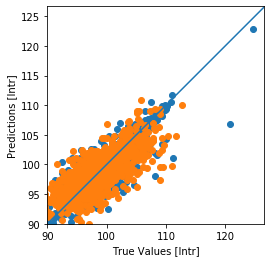

In [123]:
train_predictions = model_Intr.predict(normed_train_data).flatten()
test__predictions = model_Intr.predict(normed_test__data).flatten()
print("{},{}".format(len(train_predictions),len(train_labels_Intr)))
plt.scatter(train_labels_Intr, train_predictions)
plt.scatter(test__labels_Intr, test__predictions )

plt.xlabel('True Values [Intr]')
plt.ylabel('Predictions [Intr]')
plt.axis('equal')
plt.axis('square')
plt.xlim([90,plt.xlim()[1]])
plt.ylim([90,plt.ylim()[1]])
_ = plt.plot([0, 150], [0, 150])

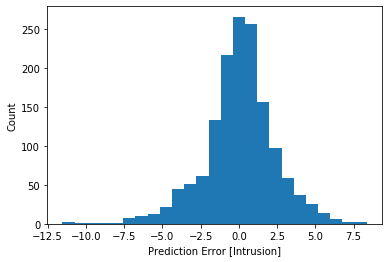

In [124]:
# train_predictions = np.array(train_value)  
# test_predictions  = np.array(test__value) 
# print("size:  {},{}".format(len(test_predictions),len(test_labels__Intr)))
# print("type:  {},{}".format(type(test_predictions),type(test_labels__Intr)))
# print("dtype: {},{}".format(test_labels__Intr.dtype,  test_predictions.dtype))
# print("ndim:  {},{}".format(test_labels__Intr.ndim,   test_predictions.ndim))
# print("size:  {},{}".format(test_labels__Intr.size,   test_predictions.size))
# print("nbytes:{},{}".format(test_labels__Intr.nbytes, test_predictions.nbytes))
# data = test__labels_Intr.iloc[0]
# print(type(data))
error = test__predictions - test__labels_Intr

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Intrusion]")
_ = plt.ylabel("Count")

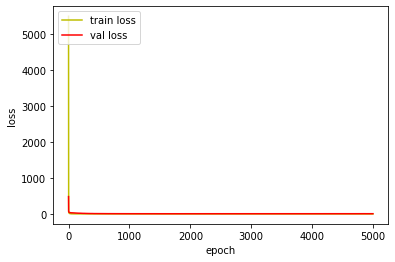

In [125]:
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
# acc_ax = loss_ax.twinx()

hist = model_Intr_history
# hist = model_Intr_early_history 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# acc_ax.plot(hist.history['mse'], 'b', label='train mse')
# acc_ax.plot(hist.history['val_mse'], 'g', label='val mse')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
# acc_ax.set_ylabel('mse')

loss_ax.legend(loc='upper left')
# acc_ax.legend(loc='lower left')

plt.show()

In [126]:
# train_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\train_dataset_intr_2.csv")
# test_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\test_dataset_intr_2.csv")

pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_intr.csv")
pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_intr.csv")

Text(0, 0.5, 'MSE_Intr')

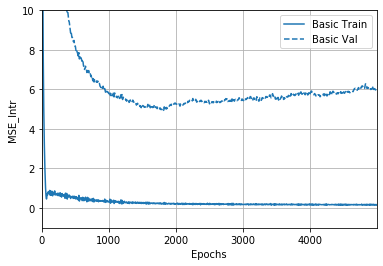

In [127]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Intr_history}, metric = "mse")
plt.ylim([-1, 10])
plt.ylabel('MSE_Intr')

## M/L for Intursion of region_2

In [128]:
# # # create the model for intusion by region_2
# EPOCHS = 5000
# nPar = 64
# nOut = 1
# iunit = nPar * nOut
# ounit = nOut
# print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
# model_Intr_2 = build_model(iunit, ounit, train_dataset_2, activation=None,loss='mse',metrics=['mse'])
# model_Intr_2, model_Intr_2_history, model_Intr_2_early_history = training(EPOCHS, model_Intr_2, normed_train_data_2, train_labels_Intr_2, verbose=0, monitor='mse', patience=5)

# model_Intr_2.save(dir+r'\trainingdata_Intr_for_Zone_2.h5')

In [129]:
# test_mae_score_Intr_2, test_mae_score1_Intr_2 = model_Intr_2.evaluate(  normed_test__data_2, test__labels_Intr_2  )
# print(test_mae_score_Intr_2, test_mae_score1_Intr_2)

In [130]:
# train_predictions = model_Intr_2.predict(normed_train_data_2).flatten()
# test__predictions = model_Intr_2.predict(normed_test__data_2).flatten()

# plt.scatter(train_labels_Intr_2, train_predictions)
# plt.scatter(test__labels_Intr_2, test__predictions)

# plt.xlabel('True Values [Intr_2]')
# plt.ylabel('Predictions [Intr_2]')
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([90,plt.xlim()[1]])
# plt.ylim([90,plt.ylim()[1]])
# _ = plt.plot([90, 150], [90, 150])

In [131]:
# error = test__predictions - test__labels_Intr_2

# plt.hist(error, bins = 25)
# plt.xlabel("Prediction Error [Intrusion_region2]")
# _ = plt.ylabel("Count")

In [132]:
# train_dataset_2.to_csv(dir+r"\train_dataset_intr_2.csv")
# test__dataset_2.to_csv(dir+r"\test__dataset_intr_2.csv")

# pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_intr_2.csv")
# pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_intr_2.csv")

In [133]:
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
# plotter.plot({'Basic': model_Intr_2_history}, metric = "mse")
# plt.ylim([-1, 2000])
# plt.ylabel('MSE_Intr_2')

## M/L for Intursion of region_3

In [134]:
# # # create the model for intusion by region_3
# EPOCHS = 5000
# nPar = 64
# nOut = 1
# iunit = nPar * nOut
# ounit = nOut
# print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
# model_Intr_3 = build_model(iunit, ounit, train_dataset_3, activation=None,loss='mse',metrics=['mse'])
# model_Intr_3, model_Intr_3_history, model_Intr_3_early_history = training(EPOCHS, model_Intr_3, normed_train_data_3, train_labels_Intr_3, verbose=0, monitor='mse', patience=5)

# model_Intr_3.save(dir+r'\trainingdata_Intr_for_Zone_3.h5')

In [135]:
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
# plotter.plot({'Basic': model_Intr_3_history}, metric = "mse")
# plt.ylim([-1, 500])
# plt.ylabel('MSE_Intr_3')

In [136]:
# test_mae_score_Intr_3, test_mae_score1_Intr_3 = model_Intr_3.evaluate(  normed_test__data_3, test__labels_Intr_3  )
# print(test_mae_score_Intr_3, test_mae_score1_Intr_3)

In [137]:
# train_predictions = model_Intr_3.predict(normed_train_data_3).flatten()
# test__predictions = model_Intr_3.predict(normed_test__data_3).flatten()

# plt.scatter(train_labels_Intr_3, train_predictions)
# plt.scatter(test__labels_Intr_3, test__predictions)

# plt.xlabel('True Values [Intr_3]')
# plt.ylabel('Predictions [Intr_3]')
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([90,plt.xlim()[1]])
# plt.ylim([90,plt.ylim()[1]])
# _ = plt.plot([90, 150], [90, 150])

In [138]:
# error = test__predictions - test__labels_Intr_3

# plt.hist(error, bins = 25)
# plt.xlabel("Prediction Error [Intrusion_region3]")
# _ = plt.ylabel("Count")

In [139]:
# train_dataset_3.to_csv(dir+r"\train_dataset_intr_3.csv")
# test__dataset_3.to_csv(dir+r"\test__dataset_intr_3.csv")

# pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_intr_3.csv")
# pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_intr_3.csv")

## M/L for Area reduction

In [140]:
EPOCHS = 5000
nPar = 64
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Area = build_model(iunit, ounit, train_dataset, activation=None,loss='mse',metrics=['mse'])
model_Area, model_Area_history, model_Area_early_history = training(EPOCHS, model_Area, normed_train_data, train_labels_Area, verbose=0, monitor='mse', patience=5)
model_Area.save(dir+r'\trainingdata_Area_for_Zone.h5')

nPar: 64, nOut: 1, iunit: 64, ounit: 1

Epoch: 0, loss:2604911.2336,  mse:2604910.5000,  val_loss:2670517.1067,  val_mse:2670516.2500,  
....................................................................................................
Epoch: 100, loss:71910.0720,  mse:71903.4922,  val_loss:230776.1756,  val_mse:230769.6094,  
....................................................................................................
Epoch: 200, loss:15815.0809,  mse:15806.4404,  val_loss:246611.9887,  val_mse:246603.3438,  
....................................................................................................
Epoch: 300, loss:5394.6995,  mse:5384.7920,  val_loss:286086.1514,  val_mse:286076.2500,  
....................................................................................................
Epoch: 400, loss:2239.0320,  mse:2228.3252,  val_loss:304286.0665,  val_mse:304275.3438,  
...........................................................................................

In [141]:
test_mae_score_Area, test_mae_score1_Area = model_Area.evaluate(  normed_test__data, test__labels_Area  )
print(test_mae_score_Area, test_mae_score1_Area)

1488/1488 [==============================] - 0s 17us/sample - loss: 291574.7091 - mse: 291556.3125
291574.70908938174 291556.3


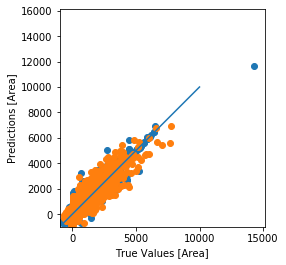

In [142]:
train_predictions = model_Area.predict(normed_train_data).flatten()
test__predictions = model_Area.predict(normed_test__data).flatten()

plt.scatter(train_labels_Area, train_predictions)
plt.scatter(test__labels_Area, test__predictions )

plt.xlabel('True Values [Area]')
plt.ylabel('Predictions [Area]')
plt.axis('equal')
plt.axis('square')
plt.xlim([plt.xlim()[0],plt.xlim()[1]])
plt.ylim([plt.ylim()[0],plt.ylim()[1]])
_ = plt.plot([-1000, 10000], [-1000, 10000])

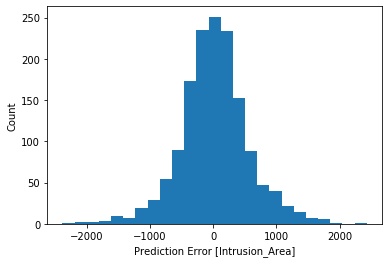

In [143]:
error = test__predictions - test__labels_Area

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Intrusion_Area]")
_ = plt.ylabel("Count")

In [144]:
# train_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\train_dataset.csv")
# test_dataset.to_csv(r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\DROP_SIMUL_200\test_dataset.csv")

pd.DataFrame(train_predictions).to_csv(dir+r"\train_pred_area.csv")
pd.DataFrame(test__predictions).to_csv(dir+r"\test__pred_area.csv")

Text(0, 0.5, 'MSE_Area')

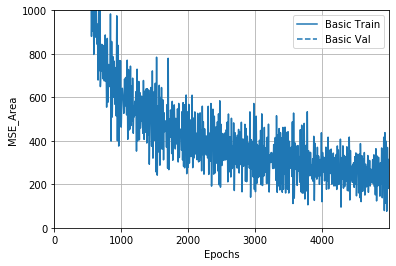

In [145]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Area_history}, metric = "mse")
plt.ylim([-0.1, 1000])
plt.ylabel('MSE_Area')

In [146]:
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
# plotter.plot({'Early Stopping': early_history}, metric = "mae")
# plt.ylim([-1, 10])
# plt.ylabel('MAE')

In [147]:
# study for dataframe
# data = {'a':[1,2,3.0],'b':[0.1,0.2,0.3],'sub':['1st','2nd','3nd']}
# df = pd.DataFrame(data)
# df
# df = pd.DataFrame(data, columns=['sub','a','b'])
# df
# df = df.reindex(index = [0,2,1])
# df
# df['c']=np.nan
# df
# df.loc[:,['c']]=[1,2,3]
# df

In [148]:
# model evaluate by curve
# model = keras.models.load_model(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_for_Zone.h5')
# test_predictions = model.predict(normed_test_data).flatten()
# test_predictions = model.predict(normed_test_data)
# print("normed_test_data: {}".format(normed_test_data))
# print("test_dataset    : {}".format(test_dataset))
# print("test_predictions: {}".format(test_predictions))


# Optimization

In [149]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential, load_model
from scipy import optimize
import time


In [150]:
# # Number of Curve points
# point = 39
# # Number of variables 
# var = 8

In [151]:
# predict_func
# Mean square error between test and prediction

def predict_func( lst ):
    import math
    # # Result of prediction data 
    reg = 0 
    
    lstVar  = [ var  for var  in lst    ]

    for i in range( 0, len(lstVar) ):
        if lstVar[i] <= 515 :
            lstVar[i] = 440
        elif 515 < lstVar[i] <= 685:
            lstVar[i] = 590
        elif 685 < lstVar[i] <= 880:
            lstVar[i] = 780
        elif 880 < lstVar[i] <= 1080:
            lstVar[i] = 980
        elif 1080 < lstVar[i] <= 1290:
            lstVar[i] = 1180
        elif 1290 < lstVar[i] :
            lstVar[i] = 1400


    lstVarN = [ norm(varN, train_stats) for varN in lstVar ]

    # predict_Reg  = model_Reg.predict( [lstVarN] )[0]
    predict_Intr = model_Intr.predict( [lstVarN] )[0]

    # predict_Intr_2 = model_Intr_2.predict( [lstVarN] )[0]
    # predict_Intr_3 = model_Intr_3.predict( [lstVarN] )[0]

    predict_Area = model_Area.predict( [lstVarN] )[0]

    # cVal = 0
    # sInt = 0 
    # sAre = 0
    # sReg = 0

    # for i in range(0,len(predict)):
    #     if i <= 20: # curve data
    #         cVal = cVal + predict[i]
    #     if i == 21: # max. intrusion
    #         sInt = predict[i]
    #     if i == 22: # area
    #         sAre = predict[i]
    #     if i == 23: # region
    #         sReg = predict[i]

    # lst_max = (dataset.max(0))
    # lst_min = (dataset.min(0))
    # print("max={}, min={} of first Column".format(lst_max[1],lst_min[1] ))

    # if predict_Reg[0] > predict_Reg[1] :
    #     predict_Intr = predict_Intr_2
    #     reg = 0
    # else:
    #     predict_Intr = predict_Intr_3
    #     reg = 1
    

    # if predict_Reg < 2.5:
    #     predict_Intr = predict_Intr_2
    # else:
    #     predict_Intr = predict_Intr_3

    norm_Int  = math.sqrt( ((predict_Intr - lst_min[57])/(lst_max[57] - lst_min[57]))**2 ) 
    # norm_Int_2  = math.sqrt( ((predict_Intr_2 - lst_min[29])/(lst_max[29] - lst_min[29]))**2 ) 
    # norm_Int_3  = math.sqrt( ((predict_Intr_3 - lst_min[29])/(lst_max[29] - lst_min[29]))**2 ) 

    norm_Area = math.sqrt( ((predict_Area - lst_min[56])/(lst_max[56] - lst_min[56]))**2 ) 


    # print("min: {}, max: {}".format(lst_min[30], lst_max[30]))
    print("parameter: {}".format(lstVar))
    print("Region: {}, Intursion: {}, Area: {}".format(reg, predict_Intr, predict_Area))

    # weight1 = 0.2


    return  norm_Int

print("minIntr: {}, maxIntr: {}, minArea: {}, maxArea:{}".format(lst_min[57],lst_max[57],lst_min[56],lst_max[56]))


minIntr: 89.13494873, maxIntr: 124.75805659999999, minArea: -2258.899065, maxArea:14282.90625


In [152]:
# normed_train_data_3

In [153]:
# 1st
bnds = [( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),                       
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 )]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")


80, 1180, 980, 980, 980, 440, 440, 1180, 590, 590, 780, 590, 1180, 590, 780, 1180, 980, 980, 780, 590, 980, 980, 1180, 590, 590, 1400, 590, 780, 780, 1180, 1180, 1180, 440, 980, 780, 590, 980]
Region: 0, Intursion: [89.598694], Area: [-1868.0803]
parameter: [980, 780, 590, 780, 980, 980, 980, 780, 980, 780, 1180, 780, 590, 1400, 980, 780, 780, 980, 1180, 980, 1180, 980, 980, 980, 440, 440, 1180, 590, 590, 780, 590, 1180, 590, 780, 1180, 980, 980, 780, 590, 980, 980, 1180, 590, 590, 1400, 590, 780, 780, 1180, 1180, 1180, 440, 980, 780, 590, 980]
Region: 0, Intursion: [89.598694], Area: [-1868.0803]
parameter: [980, 780, 590, 780, 980, 980, 980, 780, 980, 780, 1180, 780, 590, 1400, 980, 780, 780, 980, 1180, 980, 1180, 980, 980, 980, 440, 440, 1180, 590, 590, 780, 590, 1180, 590, 780, 1180, 980, 980, 780, 590, 980, 980, 1180, 590, 590, 1400, 590, 780, 780, 1180, 1180, 1180, 440, 980, 780, 590, 980]
Region: 0, Intursion: [89.598694], Area: [-1868.0803]
parameter: [980, 780, 590, 780, 980, 

In [154]:
# Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([ 968.28722093,  700.93801183,  607.334431  ,  737.55221676,
         928.46726118,  985.20978379, 1065.61277081,  756.22151977,
        1031.11527462,  797.43988155, 1268.20792594,  703.41229853,
         591.09737664, 1346.39022348, 1065.06348516,  848.66500168,
         823.84467777, 1032.72274263, 1172.91054909, 1020.57452709,
        1127.0646207 ,  999.73170772,  998.29241986,  932.54957472,
         481.19500024,  480.72502491, 1138.27902437,  639.00344058,
         535.19262137,  832.74508574,  532.53942807, 1091.68815095,
         613.5417796 ,  687.54295042, 1243.67123389,  932.25582082,
         940.28754959,  815.6286907 ,  578.35396071,  883.90955171,
        1076.18055941, 1088.12293921,  674.48903286,  669.24473906,
        1327.42532972,  627.22727815,  878.45175917,  851.01562376,
        1131.6042947 , 1153.23050419, 1107.55846936,  485.68434238,
        1062.46514397,  827.19894171,  632.36811087,  966.8084908 ]),
 0.01301809862098587)

In [155]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 :
        minimum_best1bin_x[i] = 440
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 590
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 780
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 980
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 1180
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 1400
minimum_best1bin_x   

array([ 980.,  780.,  590.,  780.,  980.,  980.,  980.,  780.,  980.,
        780., 1180.,  780.,  590., 1400.,  980.,  780.,  780.,  980.,
       1180.,  980., 1180.,  980.,  980.,  980.,  440.,  440., 1180.,
        590.,  590.,  780.,  590., 1180.,  590.,  780., 1180.,  980.,
        980.,  780.,  590.,  980.,  980., 1180.,  590.,  590., 1400.,
        590.,  780.,  780., 1180., 1180., 1180.,  440.,  980.,  780.,
        590.,  980.])

In [156]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 : 
        minimum_best1bin_x[i] = 11380000
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 11130000
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 11160000
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 11190000
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 11210000
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 60101030
minimum_best1bin_x        

array([11190000., 11160000., 11130000., 11160000., 11190000., 11190000.,
       11190000., 11160000., 11190000., 11160000., 11210000., 11160000.,
       11130000., 60101030., 11190000., 11160000., 11160000., 11190000.,
       11210000., 11190000., 11210000., 11190000., 11190000., 11190000.,
       11380000., 11380000., 11210000., 11130000., 11130000., 11160000.,
       11130000., 11210000., 11130000., 11160000., 11210000., 11190000.,
       11190000., 11160000., 11130000., 11190000., 11190000., 11210000.,
       11130000., 11130000., 60101030., 11130000., 11160000., 11160000.,
       11210000., 11210000., 11210000., 11380000., 11190000., 11160000.,
       11130000., 11190000.])

In [157]:
#Second
bnds = [( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 )]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

 780, 780, 590, 780, 780, 1400, 780, 1180, 1400, 1180, 440, 780, 1180, 1180, 780, 780, 590, 590, 780, 1400, 780, 780, 1180, 1180, 980, 980, 980, 780, 1400, 1180, 1180, 780]
Region: 0, Intursion: [89.598694], Area: [-1868.0803]
parameter: [980, 1180, 980, 980, 1180, 1180, 980, 780, 590, 1180, 780, 780, 980, 780, 1180, 1180, 980, 440, 780, 780, 980, 1180, 590, 980, 780, 780, 590, 780, 780, 1400, 780, 1180, 1400, 1180, 440, 780, 1180, 1180, 780, 780, 590, 590, 780, 1400, 780, 780, 1180, 1180, 980, 980, 980, 780, 1400, 1180, 1180, 780]
Region: 0, Intursion: [89.598694], Area: [-1868.0803]
parameter: [980, 1180, 980, 980, 1180, 1180, 980, 780, 590, 1180, 780, 780, 980, 780, 1180, 1180, 980, 440, 780, 780, 980, 1180, 590, 980, 780, 780, 590, 780, 780, 1400, 780, 1180, 1400, 1180, 440, 780, 1180, 1180, 780, 780, 590, 590, 780, 1400, 780, 780, 1180, 1180, 980, 980, 980, 780, 1400, 1180, 1180, 780]
Region: 0, Intursion: [89.598694], Area: [-1868.0803]
parameter: [980, 1180, 980, 980, 1180, 1180

In [158]:
# 2nd: Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([1005.67683853, 1217.80140344,  898.54173845,  925.4888683 ,
        1172.20568507, 1209.05277095, 1015.10469736,  876.14305136,
         568.71916801, 1150.06691129,  794.12347969,  813.67163508,
         999.95341052,  751.02334939, 1125.56786907, 1133.25100994,
         968.44276439,  441.49957921,  855.96735475,  715.63625448,
        1029.65196585, 1242.41634971,  629.59124756, 1018.64706165,
         705.15296823,  844.88914134,  516.28813587,  709.71972786,
         815.22017486, 1347.03738768,  730.56888264, 1242.32723482,
        1324.95045211, 1083.42816145,  501.48761061,  810.04055592,
        1133.98462388, 1200.89477852,  836.21847449,  818.44147546,
         541.76671964,  544.98917226,  840.84506371, 1334.25269349,
         748.85357543,  841.56601666, 1114.13579628, 1230.16475681,
        1004.61168635,  959.15475879,  941.52841933,  803.13575315,
        1325.32183816, 1082.82482251, 1215.81544464,  879.82989009]),
 0.01301809862098587)

In [159]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 : 
        minimum_best1bin_x[i] = 11380000
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 11130000
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 11160000
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 11190000
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 11210000
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 60101030
minimum_best1bin_x  
for ma in minimum_best1bin_x:
    print(ma)

11190000.0
11210000.0
11190000.0
11190000.0
11210000.0
11210000.0
11190000.0
11160000.0
11130000.0
11210000.0
11160000.0
11160000.0
11190000.0
11160000.0
11210000.0
11210000.0
11190000.0
11380000.0
11160000.0
11160000.0
11190000.0
11210000.0
11130000.0
11190000.0
11160000.0
11160000.0
11130000.0
11160000.0
11160000.0
60101030.0
11160000.0
11210000.0
60101030.0
11210000.0
11380000.0
11160000.0
11210000.0
11210000.0
11160000.0
11160000.0
11130000.0
11130000.0
11160000.0
60101030.0
11160000.0
11160000.0
11210000.0
11210000.0
11190000.0
11190000.0
11190000.0
11160000.0
60101030.0
11210000.0
11210000.0
11160000.0


In [91]:
#Third
bnds = [( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 )]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")


parameter: [980, 780, 590, 1180, 590, 1180, 780, 590, 440, 980, 980, 780, 980, 440, 1180, 440, 780, 440, 440, 780, 980, 780, 980, 590, 980, 780, 1400, 440, 980, 590, 1180, 980, 780, 590, 780, 980, 440, 780, 590, 590, 1400, 980, 590, 1400, 1180, 590, 590, 1180, 780, 1180, 1180, 780, 590, 980, 1180, 780]
Region: 0, Intursion: [91.9618], Area: [-239.27847]
parameter: [980, 780, 590, 1180, 590, 1180, 780, 590, 440, 980, 980, 780, 980, 440, 1180, 440, 780, 440, 440, 780, 980, 780, 980, 590, 980, 780, 1400, 440, 980, 590, 1180, 980, 780, 590, 780, 980, 440, 780, 590, 590, 1400, 980, 590, 1400, 1180, 590, 590, 1180, 780, 1180, 1180, 780, 590, 980, 1180, 780]
Region: 0, Intursion: [91.9618], Area: [-239.27847]
parameter: [980, 780, 590, 1180, 590, 1180, 780, 590, 440, 980, 980, 780, 980, 440, 1180, 440, 780, 440, 440, 780, 980, 780, 980, 590, 980, 780, 1400, 440, 980, 590, 1180, 980, 780, 590, 780, 980, 440, 780, 590, 590, 1400, 980, 590, 1400, 1180, 590, 590, 1180, 780, 1180, 1180, 780, 590,

In [92]:
# 3nd: Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([1044.06188303,  852.87893601,  668.00537573, 1203.32746713,
         679.94197358, 1163.09070031,  819.38156997,  550.85940294,
         489.97578722,  901.33270318, 1000.80244775,  696.6153587 ,
        1035.09883278,  513.49606809, 1144.43039716,  511.82680304,
         789.01382979,  448.18477169,  506.26732716,  711.84987659,
         928.6338914 ,  788.59470307, 1051.59669393,  653.38849593,
        1012.25980544,  840.00585539, 1313.11057968,  489.38709984,
         976.67304325,  526.88061273, 1129.42328896,  909.47624347,
         834.52771038,  614.22117711,  755.60664522, 1067.82636631,
         492.14467646,  772.4615577 ,  530.40411962,  585.24800555,
        1290.58996031,  912.74888355,  677.00913126, 1305.96133697,
        1195.80360362,  641.04721731,  523.42910924, 1146.22403071,
         796.10720753, 1286.45559427, 1109.41517805,  740.75899272,
         592.9238592 ,  921.69670302, 1238.42280911,  853.90615795]),
 0.13905132120184444)

In [93]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 : 
        minimum_best1bin_x[i] = 11380000
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 11130000
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 11160000
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 11190000
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 11210000
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 60101030
minimum_best1bin_x  

array([11190000., 11160000., 11130000., 11210000., 11130000., 11210000.,
       11160000., 11130000., 11380000., 11190000., 11190000., 11160000.,
       11190000., 11380000., 11210000., 11380000., 11160000., 11380000.,
       11380000., 11160000., 11190000., 11160000., 11190000., 11130000.,
       11190000., 11160000., 60101030., 11380000., 11190000., 11130000.,
       11210000., 11190000., 11160000., 11130000., 11160000., 11190000.,
       11380000., 11160000., 11130000., 11130000., 60101030., 11190000.,
       11130000., 60101030., 11210000., 11130000., 11130000., 11210000.,
       11160000., 11210000., 11210000., 11160000., 11130000., 11190000.,
       11210000., 11160000.])

In [94]:
# normed_test_data

# test_predictions = model.predict(normed_test_data)
# print("normed_test_data: {}".format(normed_test_data))
# print("test_dataset    : {}".format(test_dataset))
# print("test_predictions: {}".format(test_predictions))